# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sandria Amelia Putri
- **Email:** m296d4kx2215@bangkit.academy
- **ID Dicoding:** m296d4kx2215

## Menentukan Pertanyaan Bisnis

- Berapa persentase jumlah peminjaman sepeda pada hari kerja dibandingkan dengan hari non-kerja?
- Musim apa yang memiliki jumlah peminjaman sepeda tertinggi?
- Seberapa signifikan hubungan antara kondisi cuaca dengan jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load tabel day
day_df = pd.read_csv("C:/Users/Sandria/Python/Bangkit/Proyek_Analisis_Data/Dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Load tabel hour
hour_df = pd.read_csv("C:/Users/Sandria/Python/Bangkit/Proyek_Analisis_Data/Dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai Data day_df

In [4]:
# memeriksa tipe data dari tiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# menampilkan informasi jumlah missing values
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# memeriksa parameter statistik dari kolom numerik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Data hour_df

In [8]:
# memeriksa tipe data dari tiap kolom
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# menampilkan informasi jumlah missing values
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
# memeriksa parameter statistik dari kolom numerik
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan Data day_df

In [12]:
# merubah nama kolom pada tabel day
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'casual': 'unregistered', 'cnt': 'total'}

# menggunakan method rename()
day_df.rename(columns=column_mapping, inplace=True)
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,unregistered,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# mengubah tipe data beberapa kolom menjadi category
category_columns = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in category_columns:
  day_df[column] = day_df[column].astype('category')

# mengubah tipe data kolom 'date' menjadi tipe data datetime
day_df['date'] = pd.to_datetime(day_df['date'])

# memeriksa apakah tipe data sudah berubah
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    int64         
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    category      
 7   workingday    731 non-null    category      
 8   weathersit    731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  humidity      731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  unregistered  731 non-null    int64         
 14  registered    731 non-null    int64         
 15  total         731 non-null    int64     

In [14]:
# buat mapping dictionary untuk mengubah nilai pada kolom season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom year
year_mapping = {0: 2011, 1: 2012}
day_df['year'] = day_df['year'].map(year_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom month
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_df['month'] = day_df['month'].map(month_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom holiday
holiday_mapping = {0: 'No', 1: 'Yes'}
day_df['holiday'] = day_df['holiday'].map(holiday_mapping)
                                                
# buat mapping dictionary untuk mengubah nilai pada kolom weekday
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
day_df['weekday'] = day_df['weekday'].map(weekday_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom workingday
workingday_mapping = {0: 'No', 1: 'Yes'}
day_df['workingday'] = day_df['workingday'].map(workingday_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom weathersit
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day_df['weathersit'] = day_df['weathersit'].map(weathersit_mapping)

# DataFrame setelah perubahan nilai
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,unregistered,registered,total
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,No,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan Data hour_df

In [15]:
# merubah nama kolom pada tabel hour
column_mapping = {'dteday': 'date', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'hum': 'humidity', 'casual': 'unregistered', 'cnt': 'total'}

# menggunakan method rename()
hour_df.rename(columns=column_mapping, inplace=True)
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,unregistered,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# mengubah tipe data beberapa kolom menjadi category
category_columns = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

for column in category_columns:
  hour_df[column] = hour_df[column].astype('category')

# mengubah tipe data kolom 'date' menjadi tipe data datetime
hour_df['date'] = pd.to_datetime(hour_df['date'])

# memeriksa apakah tipe data sudah berubah
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   date          17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  int64         
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weathersit    17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  humidity      17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  unregistered  17379 non-null  int64         
 15  registered    17379 non-null  int64 

In [17]:
# buat mapping dictionary untuk mengubah nilai pada kolom season
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
hour_df['season'] = hour_df['season'].map(season_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom year
year_mapping = {0: 2011, 1: 2012}
hour_df['year'] = hour_df['year'].map(year_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom month
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
hour_df['month'] = hour_df['month'].map(month_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom holiday
holiday_mapping = {0: 'No', 1: 'Yes'}
hour_df['holiday'] = hour_df['holiday'].map(holiday_mapping)
                                                
# buat mapping dictionary untuk mengubah nilai pada kolom weekday
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}
hour_df['weekday'] = hour_df['weekday'].map(weekday_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom workingday
workingday_mapping = {0: 'No', 1: 'Yes'}
hour_df['workingday'] = hour_df['workingday'].map(workingday_mapping)

# buat mapping dictionary untuk mengubah nilai pada kolom weathersit
weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
hour_df['weathersit'] = hour_df['weathersit'].map(weathersit_mapping)

# DataFrame setelah perubahan nilai
hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,unregistered,registered,total
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [18]:
# memeriksa parameter statistik dari kolom numerik dan non-numerik
day_df.describe(datetime_is_numeric=True, include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,unregistered,registered,total
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,Jan,No,Sun,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [19]:
# pivot table jumlah peminjaman sepeda berdasarkan tahun
day_df.groupby(by="year").agg({
    "registered": "sum",
    "unregistered": "sum",
    "total": "sum"
})

,registered,unregistered,total
year,,,
2011,995851,247252,1243103
2012,1676811,372765,2049576


In [20]:
# pivot table jumlah peminjaman sepeda berdasarkan hari libur
day_df.groupby(by="holiday").agg({
    "registered": "sum",
    "unregistered": "sum",
    "total": "sum"
})

,registered,unregistered,total
holiday,,,
No,2616586,597658,3214244
Yes,56076,22359,78435


In [21]:
# pivot table jumlah peminjaman sepeda berdasarkan hari kerja
day_df.groupby(by="workingday").agg({
    "registered": "sum",
    "unregistered": "sum",
    "total": "sum"
})

,registered,unregistered,total
workingday,,,
No,683537,316732,1000269
Yes,1989125,303285,2292410


In [22]:
# pivot table jumlah peminjaman sepeda berdasarkan musim
day_df.groupby(by="season").agg({
    "registered": "sum",
    "unregistered": "sum",
    "total": "sum"
}).sort_values(by='total', ascending=False)

,registered,unregistered,total
season,,,
Fall,835038,226091,1061129
Summer,715067,203522,918589
Winter,711831,129782,841613
Spring,410726,60622,471348


In [23]:
# pivot table jumlah peminjaman sepeda berdasarkan kondisi cuaca
day_df.groupby(by="weathersit").agg({
    "registered": "sum",
    "unregistered": "sum",
    "total": "sum"
}).sort_values(by='total', ascending=False)

,registered,unregistered,total
weathersit,,,
Clear,1811606,446346,2257952
Mist,827082,169776,996858
Light Rain/Snow,33974,3895,37869


### Eksplorasi Data hour_df

In [24]:
# memeriksa parameter statistik dari kolom numerik dan non-numerik
hour_df.describe(datetime_is_numeric=True, include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,unregistered,registered,total
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,No,Sat,Yes,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
# pivot table rata-rata peminjaman sepeda berdasarkan waktu
hour_df.groupby(by="hour").agg({
    "registered": "mean",
    "unregistered": "mean",
    "total": "mean"
})

,registered,unregistered,total
hour,,,
0,43.739669,10.158402,53.898072
1,26.871547,6.504144,33.375691
2,18.097902,4.772028,22.869930
3,9.011478,2.715925,11.727403
4,5.098996,1.253945,6.352941
5,18.478382,1.411437,19.889819
6,71.882759,4.161379,76.044138
7,201.009629,11.055021,212.064649
8,337.331499,21.679505,359.011004


In [26]:
# pivot table jumlah peminjaman sepeda berdasarkan kondisi cuaca
hour_df.groupby(by="weathersit").agg({
    "registered": "sum",
    "unregistered": "sum",
    "total": "sum"
}).sort_values(by='total', ascending=False)

,registered,unregistered,total
weathersit,,,
Clear,1875428,462745,2338173
Mist,661471,134481,795952
Light Rain/Snow,135548,22783,158331
Heavy Rain/Snow,215,8,223


### Eksplorasi Data day_df dan hour_df

In [27]:
bike_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="inner",
    left_on="date",
    right_on="date",
    suffixes=('_hour', '_day')
)
bike_df.head()

,instant_hour,date,season_hour,year_hour,month_hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,humidity_day,windspeed_day,unregistered_day,registered_day,total_day
0,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,...,Sat,No,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,...,Sat,No,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,Spring,2011,Jan,No,Sat,No,Mist,0.344167,...,Sat,No,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
print(bike_df.columns)

Index(['instant_hour', 'date', 'season_hour', 'year_hour', 'month_hour',
       'holiday_hour', 'weekday_hour', 'workingday_hour', 'weathersit_hour',
       'temp_hour', 'atemp_hour', 'humidity_hour', 'windspeed_hour',
       'unregistered_hour', 'registered_hour', 'total_hour', 'instant_day',
       'season_day', 'year_day', 'month_day', 'hour', 'holiday_day',
       'weekday_day', 'workingday_day', 'weathersit_day', 'temp_day',
       'atemp_day', 'humidity_day', 'windspeed_day', 'unregistered_day',
       'registered_day', 'total_day'],
      dtype='object')


## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persentase jumlah peminjaman sepeda pada hari kerja dibandingkan dengan hari non-kerja?

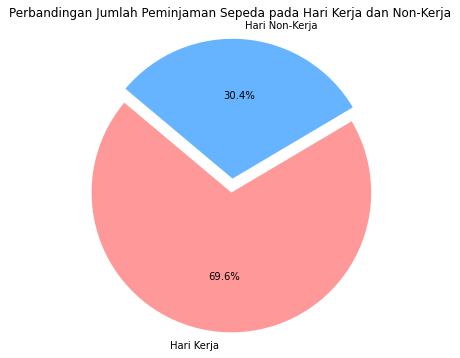

In [29]:
# hitung jumlah peminjaman sepeda pada hari kerja dan non-kerja
workingday_rentals = day_df[day_df['workingday'] == 'Yes']['total'].sum()
non_workingday_rentals = day_df[day_df['workingday'] == 'No']['total'].sum()

# membuat pie chart untuk membandingkan jumlah peminjaman sepeda pada hari kerja dan non-kerja
labels = ['Hari Kerja', 'Hari Non-Kerja']
sizes = [workingday_rentals, non_workingday_rentals]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Pecahkan slice "Hari Kerja"

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Jumlah Peminjaman Sepeda pada Hari Kerja dan Non-Kerja')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

### Pertanyaan 2: Musim apa yang memiliki jumlah peminjaman sepeda tertinggi?

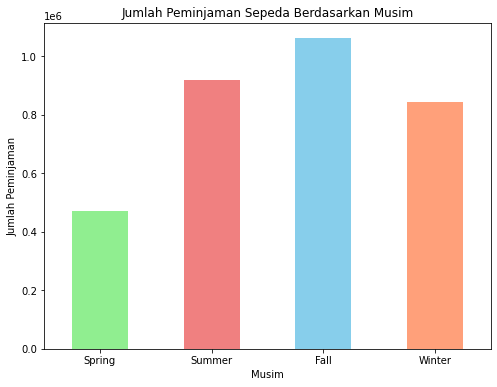

In [30]:
# hitung jumlah peminjaman sepeda berdasarkan musim
season_rentals = day_df.groupby('season')['total'].sum()

# Plot jumlah peminjaman sepeda berdasarkan musim
plt.figure(figsize=(8, 6))
season_rentals.plot(kind='bar', color=['lightgreen', 'lightcoral', 'skyblue', 'lightsalmon'])
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 3: Seberapa signifikan hubungan antara kondisi cuaca dengan jumlah peminjaman sepeda?

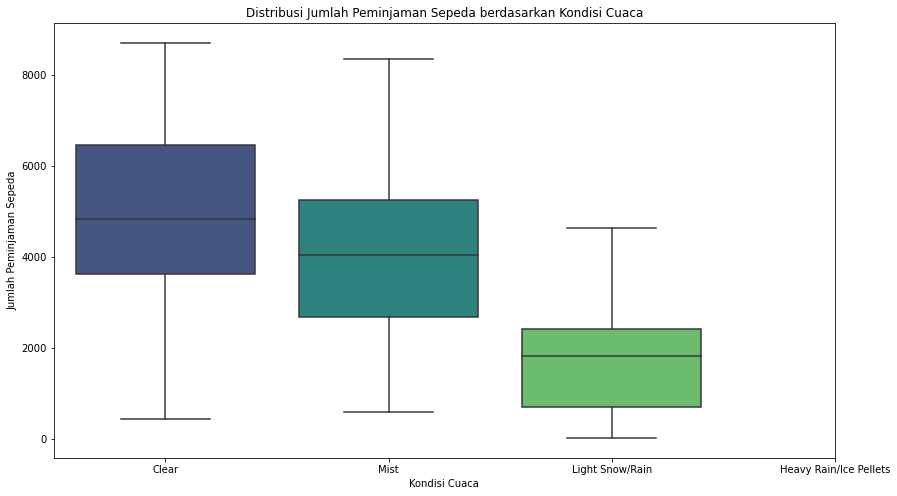

In [31]:
# boxplot distribusi data (jumlah peminjam sepeda) berdasarkan kondisi cuaca
plt.figure(figsize=(14, 8))
sns.boxplot(x='weathersit', y='total', data=day_df, palette='viridis')

plt.title('Distribusi Jumlah Peminjaman Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Ice Pellets'])
plt.show()

## Conclusion

- **Conclution pertanyaan 1**<br>
Pada hari kerja didapatkan jumlah peminjaman sepeda yang lebih tinggi dibandingkan pada hari non-kerja, dengan persentase hari kerja sebesar 69.6% dan hari non-kerja sebesar 30.4%. Temuan ini memberikan wawasan bagi perusahaan untuk meningkatkan ketersediaan sepeda pada hari kerja guna memenuhi permintaan pelanggan yang lebih tinggi pada periode tersebut.
- **Conclution pertanyaan 2**<br>
Peminjaman sepeda mencapai puncaknya pada musim panas (fall), hal ini memberikan peluang bagi perusahaan untuk merancang strategi penyesuaian harga atau penawaran khusus yang dapat meningkatkan pendapatan selama periode sibuk ini.
- **Conclution pertanyaan 3**<br>
Hubungan antara kondisi cuaca dan jumlah peminjaman sepeda cukup signifikan, dengan peminjaman yang meningkat pada cuaca cerah dan menurun pada cuaca buruk. Perusahaan dapat mengoptimalkan stok sepeda sesuai prakiraan cuaca untuk memenuhi permintaan yang berubah-ubah, meningkatkan layanan pelanggan, dan efisiensi operasional.

## RFM Analysis

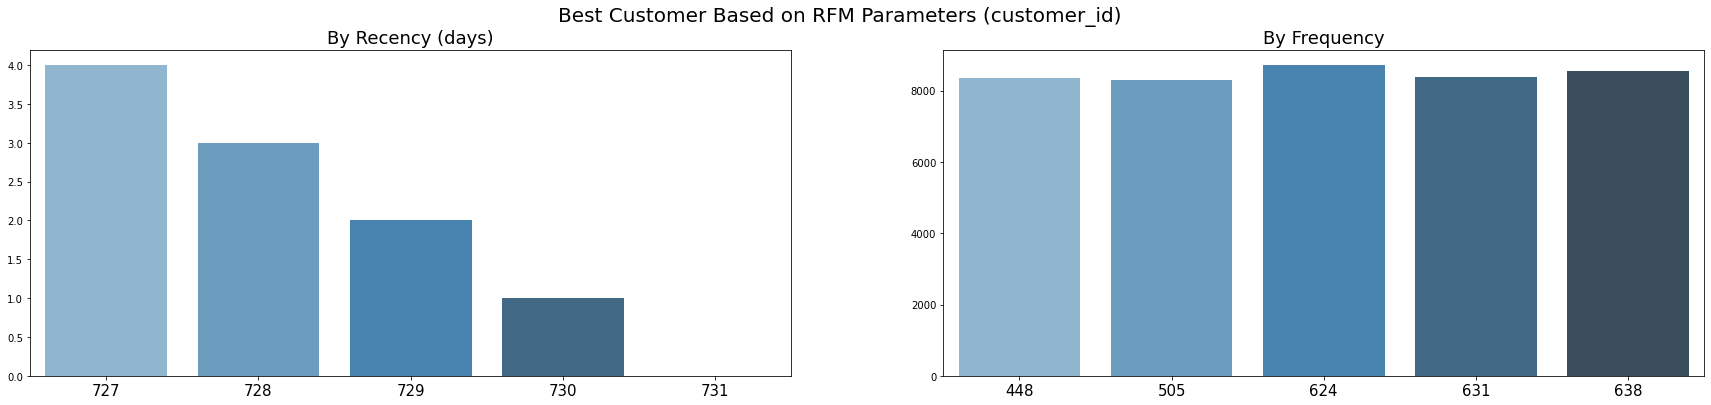

In [32]:
# hitung RFM untuk setiap pelanggan
rfm_df = day_df.groupby(by="instant", as_index=False).agg({
    "date": "max", # mengambil tanggal order terakhir
    "total": "sum" # menghitung jumlah peminjaman sepeda
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency"]

# menghitung kapan terakhir pelanggan melakukan peminjaman (hari)
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"]).dt.date
recent_date = rfm_df["max_order_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

# membuat visualisasi RFM
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(30, 6))

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette="Blues_d", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette="Blues_d", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

Pada visualisasi by recency terlihat top 5 pengguna yang loyal melakukan pembelian dalam 7 hari terakhir dan menghasilkan pendapatan tinggi dan pada visualisasi by frequency terlihat top 5 pengguna yang sering melakukan pembelian dan menghasilkan pendapatan tinggi. Perusahaan dapat memerikan perhatian khusus kepada pelanggan loyal dengan menawarkan program loyalitas, diskon, atau penawaran menarik lainnya. Perusahaan juga dapat melakukan promosi dan penawaran menarik kepada pelanggan yang sering melakukan pembelian untuk meningkatkan nilai dan loyalitas mereka.

In [33]:
day_df.to_csv("day_data.csv", index=False)

In [34]:
hour_df.to_csv("hour_data.csv", index=False)